# Matrices de Transición y Distribución Inicial

### Matrices de Transición

![](https://i.pinimg.com/originals/61/8f/84/618f842f2c07c1de4c12c068703eb72b.jpg)

Supongamos que un borracho se mueve a lo largo de 4 puntos, los cuales podemos representar de la siguiente forma:


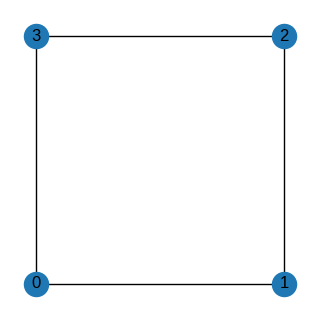

In [32]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 0)])

pos = {
    0: (0, 0),
    1: (0.5, 0),
    2: (0.5, 0.5),
    3: (0, 0.5)
}

plt.figure(figsize = (3,3))
nx.draw(G, pos, with_labels=True)
plt.show()


Dado que no tiene buen sentido de orientación, el borrachito se mueve aleatoriamente en estos 4 puntos con cierta probabilidad. Si suponemos que al inicio está en el punto $i$, entonces podrá ir a los puntos adyacentes con cierta probabilidad. Es fácil notar que este proceso es de Markov, y tiene como probabilidades de transición:

$$
P(x,y) =
\begin{cases}
q & \text{si } y = x-1 \\
p & \text{si } y = x+1 \\
0 & \text{e.o.c.}
\end{cases}
$$

Es decir, va al punto $i+1$ con probabilidad $p$ y al $i-1$ con probabilidad $q$, donde $q+p = 1$ y convenimos que el sucesor del 3 es el 0 y el antecesor del 0 es el 3.

¿Cómo podemos representar la evolución de este proceso por medio de una matriz?

\
\begin{array}{c|cccc}
   & 0 & 1 & 2 & 3 \\
\hline
0 & 0 & p & 0 & q \\
1 & q & 0 & p & 0 \\
2 & 0 & q & 0 & p \\
3 & p & 0 & q & 0 \\
\end{array}


Entonces si definimos a la matriz

$$
P = \begin{bmatrix}
0 & p & 0 & q \\
q & 0 & p & 0 \\
0 & q & 0 & p \\
p & 0 & q & 0 \\
\end{bmatrix}
$$

Tenemos que cumple que todas sus entradas son no negativas y suma 1 por filas. A matrices de este tipo se les conoce como **matrices estocásticas**.

Usando las ecuaciones de Chapman-Kolmogorov podemos verificar que:

$$
P^2(0,2) = p^2+q^2
\\
P^2(0,0) = 2pq
$$

Además, también podemos ver que:

$$
P^3(0,2) = 2p^2q+q(p^2+q^2)
\\
P^2(0,0) = 2pq^2+p(p^2+q^2)
$$

Usaremos la librería np.linalg de numpy para hacer operaciones de matrices

In [54]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sympy as sp
from numpy.linalg import matrix_power

# Definir las variables simbólicas
p = sp.Symbol('p')
q = sp.Symbol('q')

# Crear la matriz P simbólica
P = np.array([
    [0, p, 0, q],
    [q, 0, p, 0],
    [0, q, 0, p],
    [p, 0, q, 0]
])
print('P^2 =', matrix_power(P,2), '\n\n P^3 =',matrix_power(P, 3))

P^2 = [[2*p*q 0 p**2 + q**2 0]
 [0 2*p*q 0 p**2 + q**2]
 [p**2 + q**2 0 2*p*q 0]
 [0 p**2 + q**2 0 2*p*q]] 

 P^3 = [[0 2*p**2*q + q*(p**2 + q**2) 0 2*p*q**2 + p*(p**2 + q**2)]
 [2*p*q**2 + p*(p**2 + q**2) 0 2*p**2*q + q*(p**2 + q**2) 0]
 [0 2*p*q**2 + p*(p**2 + q**2) 0 2*p**2*q + q*(p**2 + q**2)]
 [2*p**2*q + q*(p**2 + q**2) 0 2*p*q**2 + p*(p**2 + q**2) 0]]


Entonces la matriz $P^n$ indica las probabilidades de transición en $n$ pasos. Es por esto que simular es muy importante, pues este tipo de cálculos suelen ser largos y para las computadoras son muy sencillos.

¿Cómo simulamos una cadena de Markov dada su matriz de transición?

**Idea para simular una cadena de Markov**<br>
El objetivo es generar una colección de valores del conjunto de estados de una cadena de Markov. Como en las computadores no podemos hacer procesos infinitos, definimos $N$ como el número de iteraciones, queremos entonces simular $\{x_0, x_1, ..., x_N\} \subseteq \mathcal{S}$.

A continuación los pasos:

  1. Simulamos $x_0$. Como tenemos nuestro vector de distribución inicial $\pi$, obtenemos un valor aleatorio de $\mathcal{S}$ con esta distribución

  2. Simulamos $x_1$. Como las cadenas de Markov solo dependen del estado anterior, basta con fijarnos en el estado anterior, entonces $x_1$ será un valor aleatorio de $\mathcal{S}$ con la distribución $P[x_0]$ (la cual es un vector, pues $P$ es una matriz

  3. Para cada $n \in \{2,....,N\}$ repetimos el paso 2 susituyendo $x_1$ por $x_n$ y añadiéndolo a nuestro proceso

Consideremos la siguiente matriz de transición:

$$
P = \begin{bmatrix}
0 & 0 & 0.9 & 0.1 \\
0.1 & 0.05 & 0.8 & 0.05 \\
0.025 & 0.025 & 0.9 & 0.05 \\
0.1 & 0.1 & 0.7 & 0.1
\end{bmatrix}
$$

¿Cómo crees que se comportará a largo plazo?



[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 0, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 1, 0, 3, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 0, 2, 3, 2]


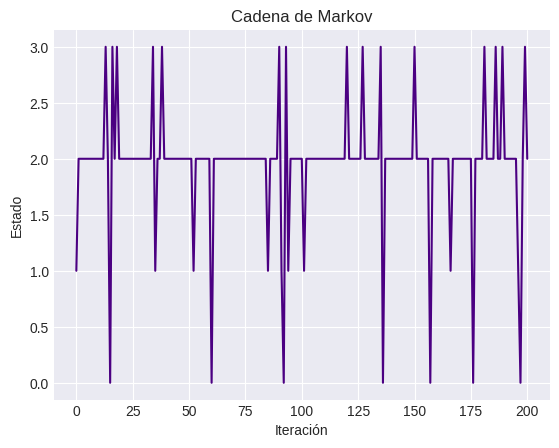

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Definimos la matriz de transición
P0 = np.array([
    [0, 0, 0.9, 0.1],
    [0.1, 0.05, 0.8, 0.05],
    [0.025, 0.025, 0.9, 0.05],
    [0.1, 0.1, 0.7, 0.1]
])

# Definimos parámetros para guardar nuestro proceso
proceso0 = [random.randint(0,3)] # randint devuelve un entero aleatorio en el intervalo [a,b]
iter = 200 # número de iteraciones del proceso

# Simulamos nuestro proceso
for i in range(iter):
  estado_actual = proceso0[-1]
  xn = np.random.choice([0,1,2,3], p=P0[estado_actual])
  proceso0.append(int(xn))

# Imprimimos el proceso
print(proceso0)

# Graficamos el proceso
plt.figure()
plt.plot(proceso0, '-', color = 'indigo')
plt.style.use('seaborn-v0_8-dark')
plt.grid()
plt.title('Cadena de Markov')
plt.xlabel('Iteración')
plt.ylabel('Estado')
plt.show()


Ahora haremos una clase Cadena de Markov para usarla en ejercicios posteriores. Además, hacemos un generador aleatorio de distribuciones iniciales (para no tener que pensar tanto)

In [12]:
class CadenaMarkov:

  # Definimos el constructor de la clase
  def __init__(self, P, pi_0):
    self.P = P
    self.pi_0 = pi_0
    self.proceso = [np.random.choice(range(len(pi_0)), p = pi_0)]

  # Simulamos la cadena igual que antes
  def simular(self, iter):
    for i in range(iter):
      estado_actual = self.proceso[-1]
      xn = np.random.choice(range(len(self.pi_0)), p = self.P[estado_actual])
      self.proceso.append(int(xn))
    return self.proceso

  # Graficamos la trayectoria generada de nuestro proceso
  def plot(self, co):
    plt.figure(figsize=(7,4))
    plt.plot(self.proceso, '-', color = co, ms=1)
    plt.style.use('seaborn-v0_8-dark')
    plt.grid()
    plt.title('Cadena de Markov')
    plt.xlabel('Iteración')
    plt.ylabel('Estado')
    plt.show()

In [13]:
def generador_iniciales(n):
  pi_0 = np.random.rand(n) # Crea un array de n valores uniformes(0,1)
  pi_0 = pi_0/sum(pi_0) # Normaliza el vector
  return pi_0

Ahora consideremos la matriz de transición

$\left(\begin{array}{cccc}0 & 0.2 & 0.1 & 0.7 \\ 0.1 & 0.4 & 0.3 & 0.2 \\ 0.8 & 0.2 & 0 & 0 \\ 0.1 & 0.1 & 0.7 & 0.1\end{array}\right)$

veamos cómo funciona nuestra clase

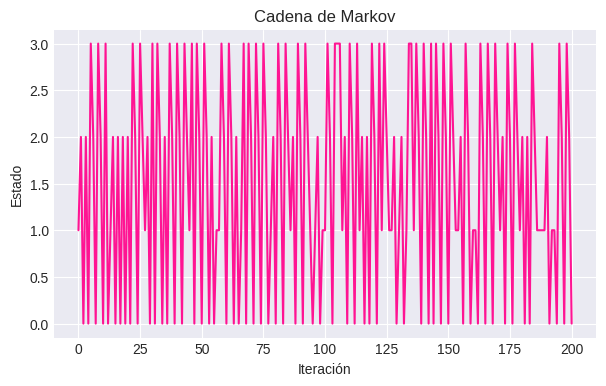

In [14]:
P1 = np.array([
    [0.0, 0.2, 0.1, 0.7],
    [0.1, 0.4, 0.3, 0.2],
    [0.8, 0.2, 0.0, 0.0],
    [0.1, 0.1, 0.7, 0.1]
])

pi0 = generador_iniciales(4)
cadena1 = CadenaMarkov(P1, pi0)
cadena1.simular(200)
cadena1.plot('deeppink')

### Distribuciones Iniciales
##### ¿Por qué hablar de distribuciones iniciales?

Si consideramos la cadena de Markov con matriz de transición

$$P=\left[\begin{array}{ll}1 & 0 \\ 0 & 1\end{array}\right]$$

¿qué pasa si mi distribución inicial es $\pi_1=(1,0)$? ¿y si fuera $\pi_2=(0,1)$?



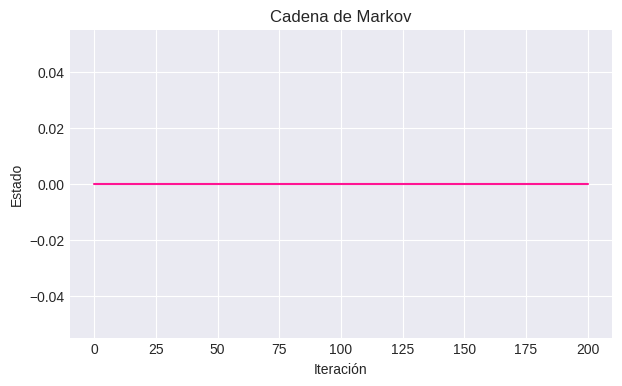

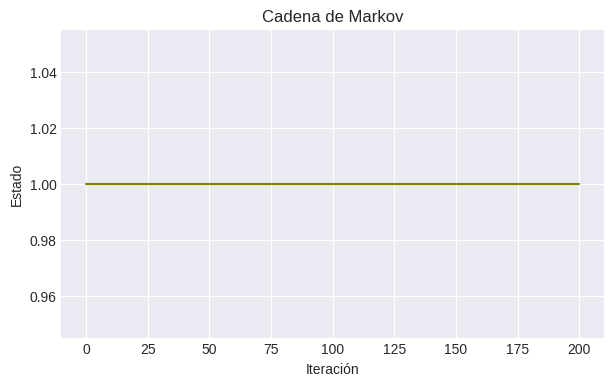

In [16]:
# Inicializamos la matriz de transición y distribuciones iniciales
P2 = [[1,0],
      [0,1]]
pi1 = [1,0]
pi2 = [0,1]
iter = 200

cadena3 = CadenaMarkov(P2, pi1)
cadena4 = CadenaMarkov(P2, pi2)
cadena3.simular(iter)
cadena4.simular(iter)
cadena3.plot('deeppink')
cadena4.plot('olive')


¡El comportamiento es determinista! Es importante saber de dónde empezamos pues de ahí depende nuestro comportamiento a largo plazo en una cadena de Markov.

Ejercicio: Haz el código para simular una cadena de Markov con matriz de transición

$\left(\begin{array}{cccc}0 & 0 & 0.1 & 0.9 \\ 0 & 0 & 0.6 & 0.4 \\ 0.8 & 0.2 & 0 & 0 \\ 0.4 & 0.6 & 0 & 0\end{array}\right)$

Grafica la cadena y clasifica los estados.

